# Data Cleaning, Wrangling & Exploring for Build Week ML Prediction Model

## Exploring Data Set

In [21]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading .csv file

path = 'cannabis.csv'

df = pd.read_csv(path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [9]:
# Checking data frame

df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [10]:
# Checking shape of Data Frame

df.shape

(2351, 6)

In [13]:
# Columns

df.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description'], dtype='object')

In [17]:
# Creating copy of Data Frame

strains = df.copy().reset_index()

In [18]:
strains.columns

Index(['index', 'Strain', 'Type', 'Rating', 'Effects', 'Flavor',
       'Description'],
      dtype='object')

In [19]:
strains.head()

,index,Strain,Type,Rating,Effects,Flavor,Description
0,0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [20]:
# Checking for Null Values

strains.isnull().sum()

index           0
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [22]:
# Checking Number of Strain Types

strains['Type'].value_counts()

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64

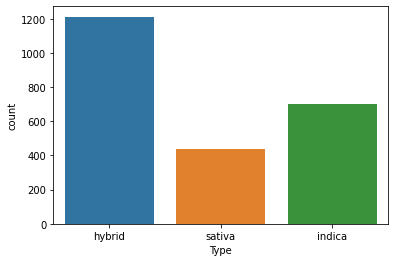

In [25]:
# Visualizing Strain Types

sns.countplot(strains['Type']);

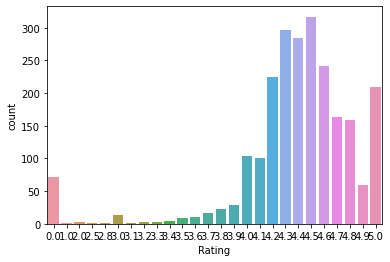

In [26]:
# Strains by Rating

sns.countplot(strains['Rating']);

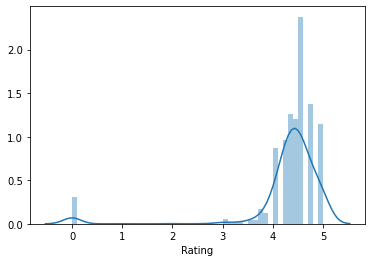

In [31]:
sns.distplot(strains.Rating);

In [32]:
strains.Effects.unique()

array(['Creative,Energetic,Tingly,Euphoric,Relaxed',
       'Relaxed,Aroused,Creative,Happy,Energetic',
       'Uplifted,Happy,Relaxed,Energetic,Creative', ...,
       'Happy,Energetic,Uplifted,Euphoric,Focused',
       'Relaxed,Sleepy,Talkative,Euphoric,Happy',
       'Hungry,Relaxed,Uplifted,Happy,Sleepy'], dtype=object)

In [34]:
len(strains.Effects.unique())

1655

## Cleaning & Preprocessing Data

In [16]:
# Replacing '-' characters with spaces 

strains['Strain'] = strains['Strain'].str.replace('-', ' ')

In [42]:
# Replacing '/' characters with commas 

strains['Flavors'] = strains['Flavor'].str.replace('/', ',')
strains = strains.drop('Flavor', axis=1)

In [43]:
strains.head()

,index,Strain,Type,Rating,Effects,Description,Cosine Similarities,Flavors
0,0,100 Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed",$100 OG is a 50/50 hybrid strain that packs a ...,NaN,"Earthy,Sweet,Citrus"
1,1,98 White Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic",The ‘98 Aloha White Widow is an especially pot...,NaN,"Flowery,Violet,Diesel"
2,2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative",1024 is a sativa-dominant hybrid bred in Spain...,NaN,"Spicy,Herbal,Sage,Woody"
3,3,13 Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted",13 Dawgs is a hybrid of G13 and Chemdawg genet...,NaN,"Apricot,Citrus,Grapefruit"
4,4,24K Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Also known as Kosher Tangie, 24k Gold is a 60%...",NaN,"Citrus,Earthy,Orange"


### Cleaning Zero values

In [45]:
strains['Rating'] = strains['Rating'].apply(lambda x: np.NaN if x == 0.0 else x)

In [47]:
strains['Effects'] = strains['Effects'].apply(lambda x: np.NaN if x == 'None' else x)

In [49]:
strains['Type'] = strains['Type'].apply(lambda x: np.NaN if x == 'None' else x)

In [51]:
strains.isna().sum()

index                     0
Strain                    0
Type                      0
Rating                   71
Effects                  87
Description              33
Cosine Similarities    2351
Flavors                  46
dtype: int64

In [40]:
# strains['Cosine Similarities'] = np.nan

In [33]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
